In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data():
    # Load the training data
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

    # Load the test data
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
    
    return X_train, y_train, X_test, y_test

# Preprocess the data
def preprocess_data(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Train and evaluate Logistic Regression
def logistic_regression(X_train, y_train, X_test, y_test):
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train.values.ravel())
    y_pred = lr_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate Linear Regression (for comparison purposes)
def linear_regression(X_train, y_train, X_test, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = np.round(lr_model.predict(X_test)).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nLinear Regression Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate SVM
def svm_classifier(X_train, y_train, X_test, y_test):
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train, y_train.values.ravel())
    y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nSVM Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate Random Forest
def random_forest_classifier(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train, y_train.values.ravel())
    y_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nRandom Forest Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate K-Nearest Neighbors (KNN)
def knn_classifier(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train.values.ravel())
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nK-Nearest Neighbors (KNN) Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

def decision_tree_classifier(X_train, y_train, X_test, y_test):
    # Initialize the Decision Tree classifier
    dt_model = DecisionTreeClassifier(random_state=42)
    
    # Train the model
    dt_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print("\nDecision Tree classifier Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Function to plot the bar graph for accuracy
def plot_accuracy(accuracies):
    models = list(accuracies.keys())
    values = list(accuracies.values())

    plt.figure(figsize=(8, 5))
    plt.bar(models, values, color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.ylim([0, 1])
    plt.show()

# Function to plot Precision, Recall, and F1-Score
def plot_precision_recall_f1(reports, metric):
    metrics = ['precision', 'recall', 'f1-score']
    if metric not in metrics:
        raise ValueError(f"Invalid metric: {metric}. Choose from {metrics}.")
    
    plt.figure(figsize=(10, 5))
    for model, report in reports.items():
        scores = [report[str(i)][metric] for i in range(1, 7)]
        plt.bar([f'{model} - Class {i}' for i in range(1, 7)], scores, label=model)
    
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} Scores for Each Class Across Models')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot Confusion Matrices
def plot_confusion_matrix(cms):
    plt.figure(figsize=(15, 10))
    
    # Loop through confusion matrices and plot
    for i, (model, cm) in enumerate(cms.items()):
        # Create a 2x3 grid for the 6 models
        plt.subplot(2, 3, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()



In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

def deep_learning_model(X_train, y_train, X_test, y_test):
    # Convert labels to categorical (one-hot encoding)
    y_train_cat = to_categorical(y_train - 1)  # Labels in the HAR dataset start from 1, so we subtract 1
    y_test_cat = to_categorical(y_test - 1)
    
    # Build the model
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))  # 6 classes for the 6 activities
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64, validation_data=(X_test, y_test_cat), verbose=1)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1) + 1  # Convert predictions back to original label range
    
    # Compute the classification report and confusion matrix
    accuracy = accuracy_score(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    cm = confusion_matrix(y_test, y_pred_classes)
    
    print("\nDeep Learning Model Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred_classes))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm, history


In [3]:
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    # Training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


Logistic Regression Results:
Accuracy: 0.9552086868001357
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.95      0.95       471
           3       0.99      0.94      0.96       420
           4       0.97      0.88      0.92       491
           5       0.89      0.97      0.93       532
           6       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[493   0   3   0   0   0]
 [ 23 447   1   0   0   0]
 [  6  18 394   0   2   0]
 [  0   2   0 430  58   1]
 [  0   0   0  14 518   0]
 [  0   0   0   0   4 533]]


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_clas


Linear Regression Results:
Accuracy: 0.8517136070580251
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.88      0.89       496
           2       0.72      0.88      0.79       471
           3       0.93      0.74      0.82       420
           4       0.89      0.84      0.86       491
           5       0.84      0.90      0.87       532
           6       0.98      0.86      0.91       537
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.85      2947
   macro avg       0.53      0.51      0.52      2947
weighted avg       0.88      0.85      0.86      2947

Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  3 434  59   0   0   0   0   0   0   0]
 [  0  40 415  16   0   0   0   0   0   0]
 [  0   0 10

C:\Users\madhu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4332 - loss: 1.4698 - val_accuracy: 0.8741 - val_loss: 0.3932
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4771 - val_accuracy: 0.9223 - val_loss: 0.2403
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.2927 - val_accuracy: 0.9223 - val_loss: 0.1988
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9095 - loss: 0.2461 - val_accuracy: 0.9362 - val_loss: 0.1982
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.1979 - val_accuracy: 0.9284 - val_loss: 0.1898
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1731 - val_accuracy: 0.9379 - val_loss: 0.1806
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1445 - val_accuracy: 0.9430 - val_loss: 0.1638
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.1244 - val_accuracy: 0.9447 - val_

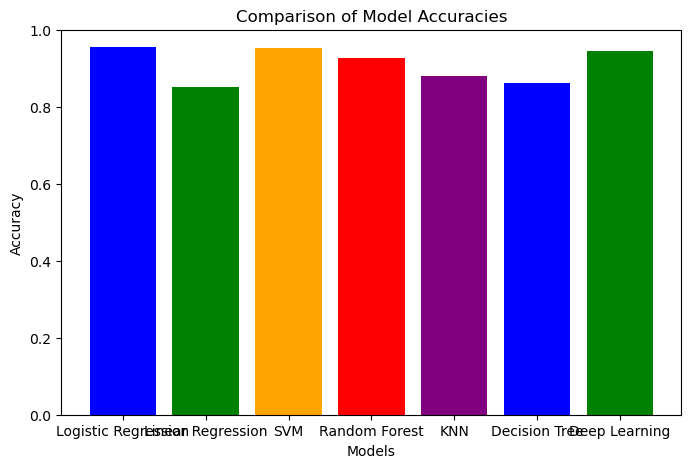

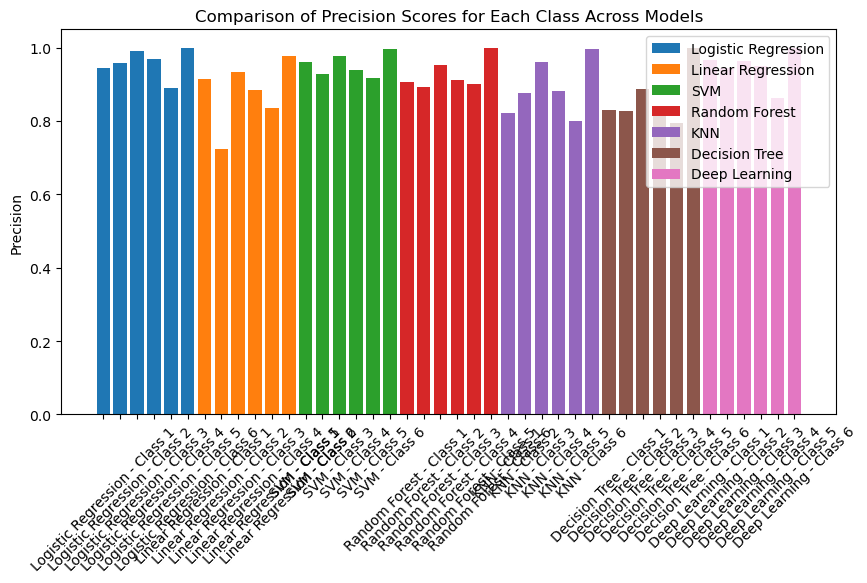

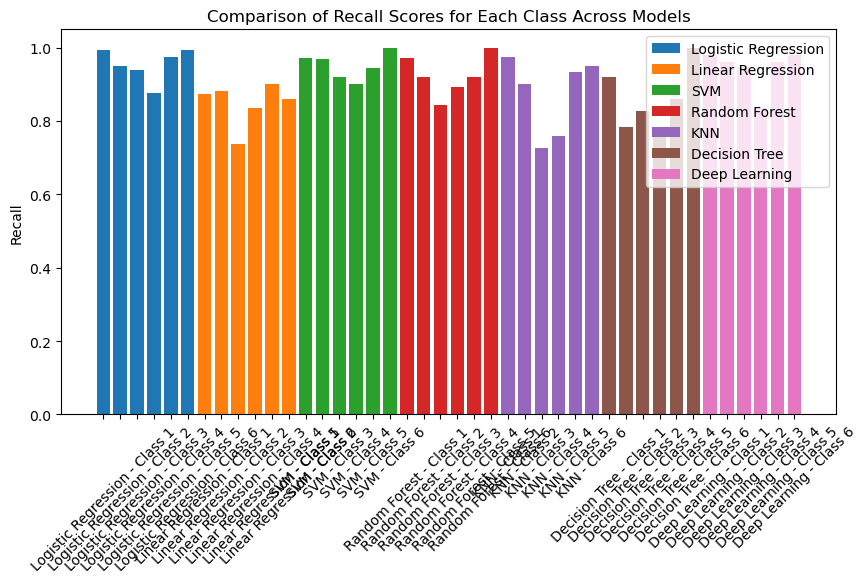

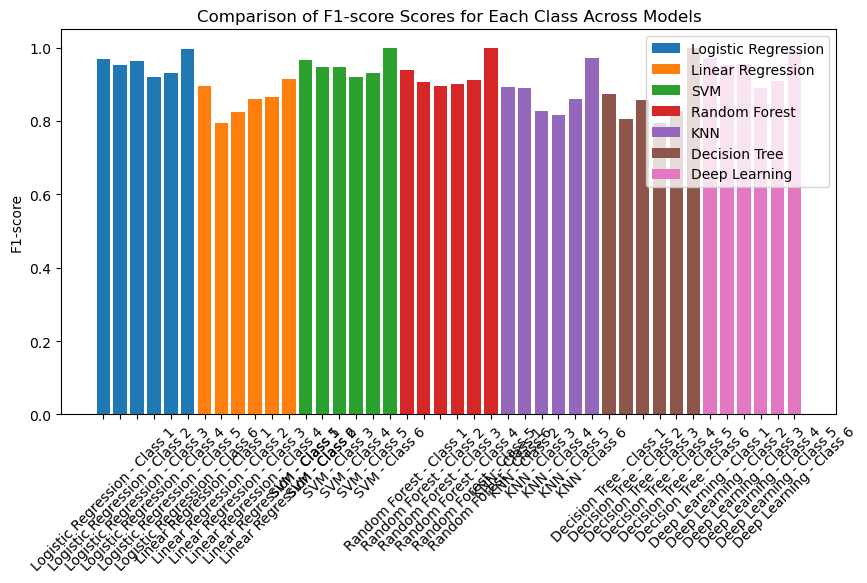

ValueError: num must be an integer with 1 <= num <= 6, not 7

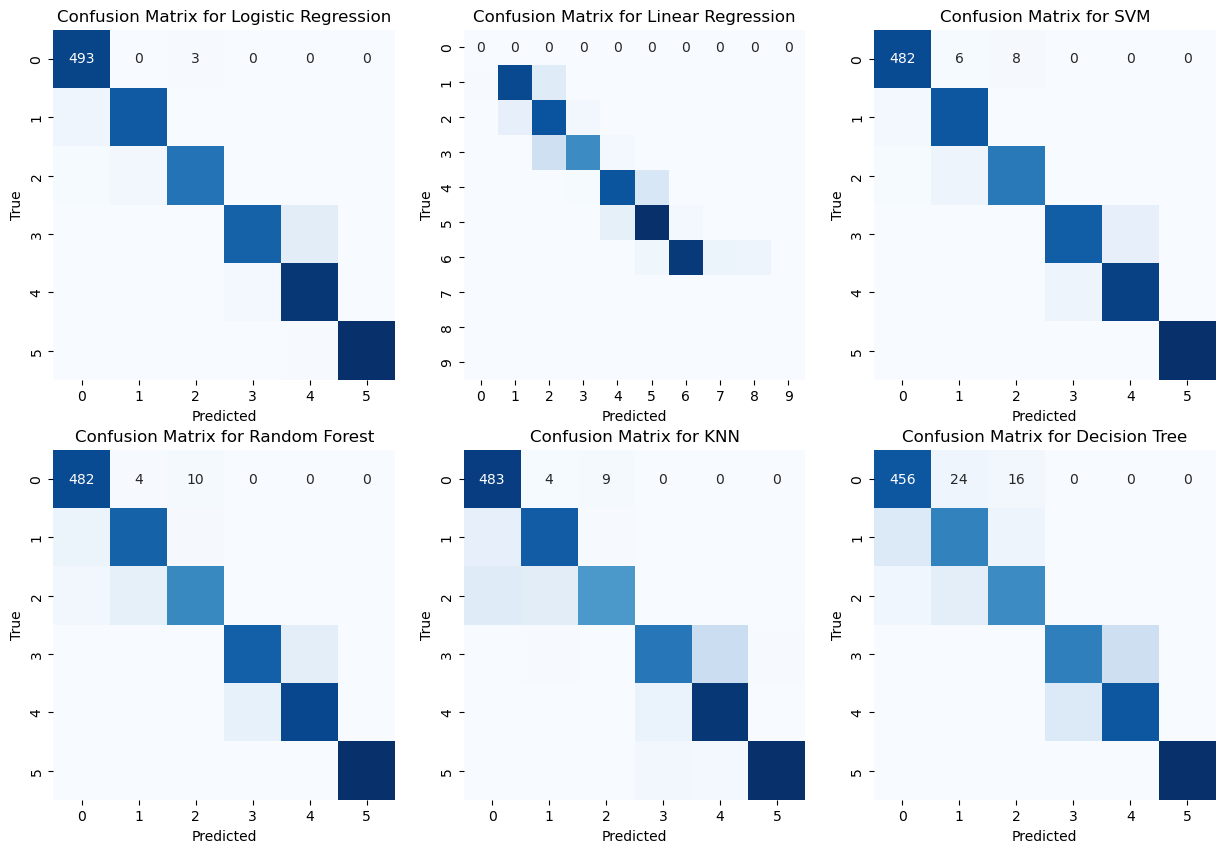

In [4]:
if __name__ == "__main__":
    # Load data
    X_train, y_train, X_test, y_test = load_data()
    
    # Preprocess data
    X_train, X_test = preprocess_data(X_train, X_test)
    
    # Store accuracies, reports, and confusion matrices
    accuracies = {}
    reports = {}
    cms = {}

    # Logistic Regression
    accuracies['Logistic Regression'], reports['Logistic Regression'], cms['Logistic Regression'] = logistic_regression(X_train, y_train, X_test, y_test)
    
    # Linear Regression
    accuracies['Linear Regression'], reports['Linear Regression'], cms['Linear Regression'] = linear_regression(X_train, y_train, X_test, y_test)
    
    # SVM
    accuracies['SVM'], reports['SVM'], cms['SVM'] = svm_classifier(X_train, y_train, X_test, y_test)
    
    # Random Forest
    accuracies['Random Forest'], reports['Random Forest'], cms['Random Forest'] = random_forest_classifier(X_train, y_train, X_test, y_test)
    
    # KNN
    accuracies['KNN'], reports['KNN'], cms['KNN'] = knn_classifier(X_train, y_train, X_test, y_test)

    #Decision Tree
    accuracies['Decision Tree'], reports['Decision Tree'], cms['Decision Tree'] = decision_tree_classifier(X_train, y_train, X_test, y_test)
    
    # Deep Learning Model
    accuracies['Deep Learning'], reports['Deep Learning'], cms['Deep Learning'], history = deep_learning_model(X_train, y_train, X_test, y_test)
    
    # Plot the results
    plot_accuracy(accuracies)
    plot_precision_recall_f1(reports, 'precision')
    plot_precision_recall_f1(reports, 'recall')
    plot_precision_recall_f1(reports, 'f1-score')
    
    # Plot confusion matrices for all models
    plot_confusion_matrix(cms)
    
    # Plot deep learning training history
    plot_training_history(history)


In [5]:
import hashlib
import json
from time import time

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_data = []
        # Create the genesis block
        self.new_block(previous_hash='1', proof=100)

    def new_block(self, proof, previous_hash=None):
        """
        Create a new Block in the Blockchain
        :param proof: The proof given by the Proof of Work algorithm
        :param previous_hash: Hash of previous Block
        :return: New Block
        """
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'data': self.current_data,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        # Reset the current data list
        self.current_data = []
        self.chain.append(block)
        return block

    def new_data(self, model_name, accuracy, precision, recall, f1_score, confusion_matrix):
        """
        Adds a new model evaluation result to the data pool.
        """
        self.current_data.append({
            'model_name': model_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': confusion_matrix.tolist()  # Convert numpy array to list for JSON compatibility
        })

    @staticmethod
    def hash(block):
        """
        Hashes a Block
        :param block: Block
        :return: <str> The hash of the block
        """
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    def last_block(self):
        """
        Return the last block in the chain
        """
        return self.chain[-1]

    def proof_of_work(self, last_proof):
        """
        Simple Proof of Work Algorithm:
         - Find a number p' such that hash(pp') contains 4 leading zeroes
         - p is the previous proof, and p' is the new proof
        """
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        """
        Validates the Proof: Does hash(last_proof, proof) contain 4 leading zeroes?
        """
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"


In [11]:
def evaluate_and_add_to_blockchain(blockchain, model_name, accuracy, report, cm):
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Add the evaluation results to the blockchain
    blockchain.new_data(model_name, accuracy, precision, recall, f1_score, cm)
    
    # Get the last proof of work and perform the new proof of work
    last_block = blockchain.last_block()
    last_proof = last_block['proof']
    proof = blockchain.proof_of_work(last_proof)
    
    # Add a new block to the blockchain with the new proof
    blockchain.new_block(proof)
    
    print(f"Model {model_name} added to blockchain with accuracy: {accuracy}")

# Instantiate the blockchain
blockchain = Blockchain()

# Example usage after evaluating each model
# Logistic Regression
accuracy, report, cm = logistic_regression(X_train, y_train, X_test, y_test)
evaluate_and_add_to_blockchain(blockchain, "Logistic Regression", accuracy, report, cm)

# SVM
accuracy, report, cm = svm_classifier(X_train, y_train, X_test, y_test)
evaluate_and_add_to_blockchain(blockchain, "SVM", accuracy, report, cm)

# Random Forest
accuracy, report, cm = random_forest_classifier(X_train, y_train, X_test, y_test)
evaluate_and_add_to_blockchain(blockchain, "Random Forest", accuracy, report, cm)

# KNN
accuracy, report, cm = knn_classifier(X_train, y_train, X_test, y_test)
evaluate_and_add_to_blockchain(blockchain, "KNN", accuracy, report, cm)

# Deep Learning Model
accuracy, report, cm, history = deep_learning_model(X_train, y_train, X_test, y_test)
evaluate_and_add_to_blockchain(blockchain, "Deep Learning", accuracy, report, cm)

# Display the blockchain
print("Blockchain Ledger:")
for block in blockchain.chain:
    print(json.dumps(block, indent=4))


Logistic Regression Results:
Accuracy: 0.9552086868001357
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.95      0.95       471
           3       0.99      0.94      0.96       420
           4       0.97      0.88      0.92       491
           5       0.89      0.97      0.93       532
           6       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[493   0   3   0   0   0]
 [ 23 447   1   0   0   0]
 [  6  18 394   0   2   0]
 [  0   2   0 430  58   1]
 [  0   0   0  14 518   0]
 [  0   0   0   0   4 533]]
Model Logistic Regression added to blockchain with accuracy: 0.9552086868001357

SVM Results:
Accuracy: 0.9521547336274178
Classification Report:
               precision    recall  f1-score   

C:\Users\madhu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4275 - loss: 1.4225 - val_accuracy: 0.8860 - val_loss: 0.3828
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4987 - val_accuracy: 0.9169 - val_loss: 0.2390
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3178 - val_accuracy: 0.9379 - val_loss: 0.2035
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2397 - val_accuracy: 0.9359 - val_loss: 0.1918
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.2012 - val_accuracy: 0.9382 - val_loss: 0.1923
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.1647 - val_accuracy: 0.9440 - val_loss: 0.1817
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9503 - loss: 0.1386 - val_accuracy: 0.9447 - val_loss: 0.1713
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.1188 - val_accuracy: 0.9474 - val_